In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from PY_tweet.lists_file import *

tweets_list = loadJoblib('DATA_all_texts/only_4labels_textdata.joblib')

In [4]:
!pip install janome

In [5]:
from janome.tokenizer import Tokenizer
from janome.analyzer import Analyzer
from janome.tokenfilter import POSStopFilter

tokenizer = Tokenizer()
token_filters = [POSStopFilter(['記号','助詞','助動詞','動詞'])]
a = Analyzer(tokenizer=tokenizer, token_filters=token_filters)

In [6]:
test_tokens = a.analyze(tweets_list)

In [7]:
wakati = {}
for idx, tweet in enumerate(tweets_list):
    tokens = a.analyze(tweet)
    wakati[idx] = ' '.join([t.surface for t in tokens])

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
import random
vectorizer = CountVectorizer()

In [9]:
X = vectorizer.fit_transform(wakati[i] for i in wakati.keys())
bows = {}
for i, bow in enumerate(X.toarray()):
    bows[i] = bow

In [28]:
WORDS = vectorizer.get_feature_names()
# print(WORDS)

In [20]:
count = []
for _ in range(len(bows[0])):
    count.append(0)

In [21]:
len(count)

64980

In [29]:
for idx, cnt in enumerate(bows[0]):
    if cnt != 0:
        print(f'{WORDS[idx]}はあります')

19はあります
coはあります
covidはあります
httpsはあります
whoはあります
zfqkggxpseはあります
ウイルスはあります
コロナはあります
名称はあります
新型はあります
更新はあります
正式はあります
発表はあります


In [31]:
count = []
for _ in range(len(bows[0])):
    count.append(0)

for i in range(len(bows)):
    for idx, cnt in enumerate(bows[i]):
        count[idx] += cnt

In [32]:
count[:10]

[261, 76, 4, 1, 2, 3, 8, 1, 1, 1]

In [73]:
import numpy as np

count_np = np.array(count)
count_np_index = np.argsort(count_np)[::-1]

In [74]:
np.save('count_np.npy', count_np)
np.save('count_np_index.npy', count_np_index)

In [100]:
top100 = []

for i in count_np_index[:300]:
    top100.append([WORDS[i], count_np[i]])

/home/takakiyuto/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


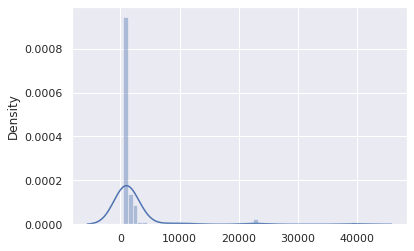

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.distplot(count_np[count_np_index[:100]])
plt.show()

In [102]:
top100

[['コロナ', 39757],
 ['co', 22782],
 ['https', 22736],
 ['新型', 11834],
 ['ウイルス', 9695],
 ['感染', 7922],
 ['こと', 3840],
 ['対策', 3332],
 ['マスク', 2808],
 ['日本', 2546],
 ['19', 2382],
 ['影響', 2273],
 ['さん', 2230],
 ['covid', 2185],
 ['ニュース', 2110],
 ['ない', 1999],
 ['よう', 1965],
 ['そう', 1878],
 ['この', 1869],
 ['ウィルス', 1776],
 ['東京', 1763],
 ['中国', 1742],
 ['いい', 1608],
 ['今日', 1593],
 ['これ', 1433],
 ['自粛', 1353],
 ['拡大', 1224],
 ['どう', 1169],
 ['ため', 1169],
 ['世界', 1162],
 ['肺炎', 1151],
 ['緊急', 1135],
 ['医療', 1133],
 ['事態', 1081],
 ['経済', 1074],
 ['10', 1059],
 ['情報', 1046],
 ['仕事', 1025],
 ['検査', 1015],
 ['時間', 1012],
 ['確認', 983],
 ['宣言', 981],
 ['みんな', 954],
 ['支援', 951],
 ['もう', 949],
 ['対応', 940],
 ['解除', 935],
 ['質問', 922],
 ['自分', 911],
 ['2020', 876],
 ['政府', 874],
 ['せい', 860],
 ['生活', 860],
 ['オンライン', 859],
 ['その', 841],
 ['それ', 830],
 ['中止', 813],
 ['また', 811],
 ['再開', 798],
 ['安倍', 765],
 ['まだ', 757],
 ['新た', 752],
 ['みたい', 743],
 ['怖い', 721],
 ['もの', 716],
 ['武漢', 714],
 ['状況', 708